**Prerequisites**: 
    - numpy
    - straph
    - matplotlib
    - seaborn
    - networkx

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from straph import stream_graph as sg
import straph.generators as gen

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

Let's start by loading an example of a Stream Graph.

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  7
Nb of segmented links :  10.0


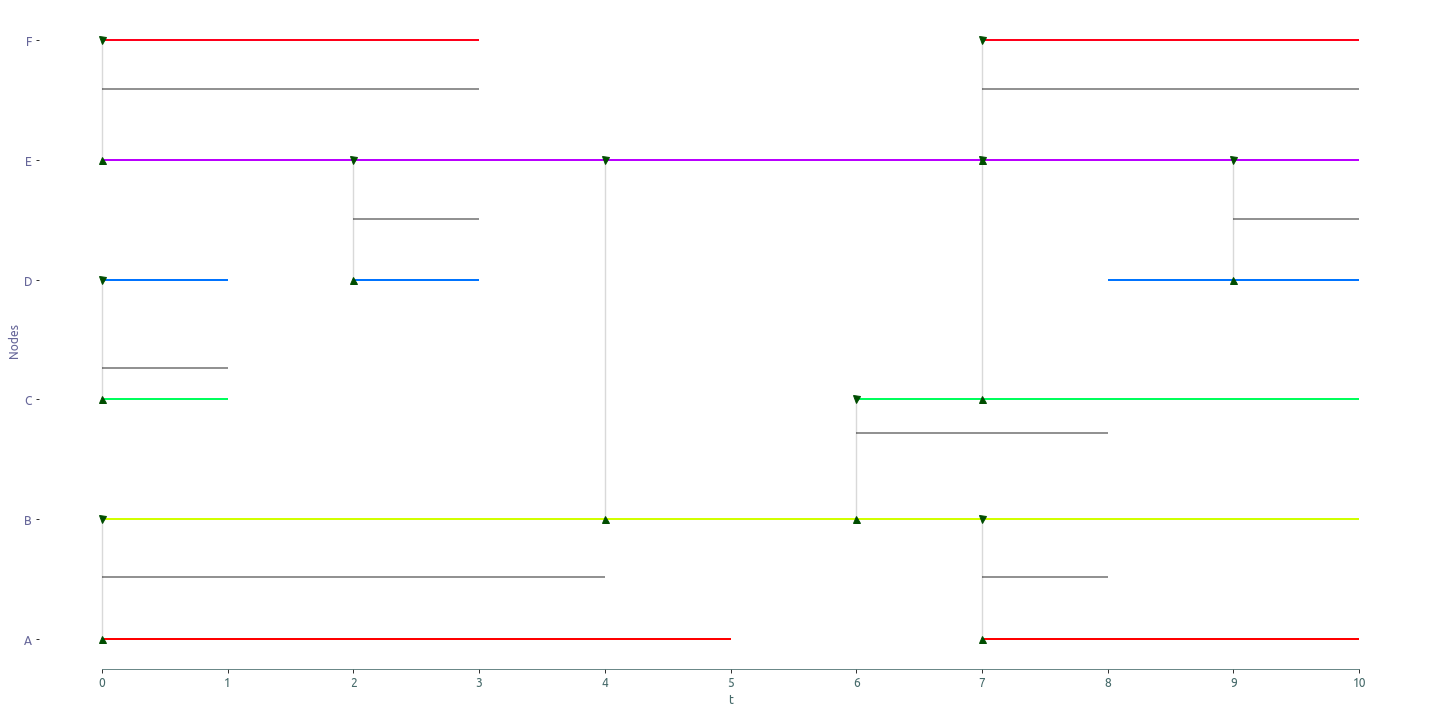

In [4]:
path_directory = os.getcwd()+"/../examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()
S.plot()

As in graphs, one may want to extract a specific subpart of a stream graph.

# 1. Induced Graphs

## 1.1 Aggregated Graph

Let's take a look at the aggregated Stream Graph. We remove all temporal information and aggregate the structural one.

In [4]:
a_l = S.aggregated_graph() # This method returns an adjacency list

We can visualise this graph with networkx.

/home/leo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{'A': Text(1.0, 2.4504569859664533e-08, 'A'),
 'B': Text(0.49999997764825854, 0.8660254594452442, 'B'),
 'C': Text(-0.5000000372529024, 0.8660253998406003, 'C'),
 'D': Text(-0.9999999701976781, -6.291820541111046e-08, 'D'),
 'E': Text(-0.4999998882412927, -0.8660254104361045, 'E'),
 'F': Text(0.49999991804361466, -0.8660254104361045, 'F')}

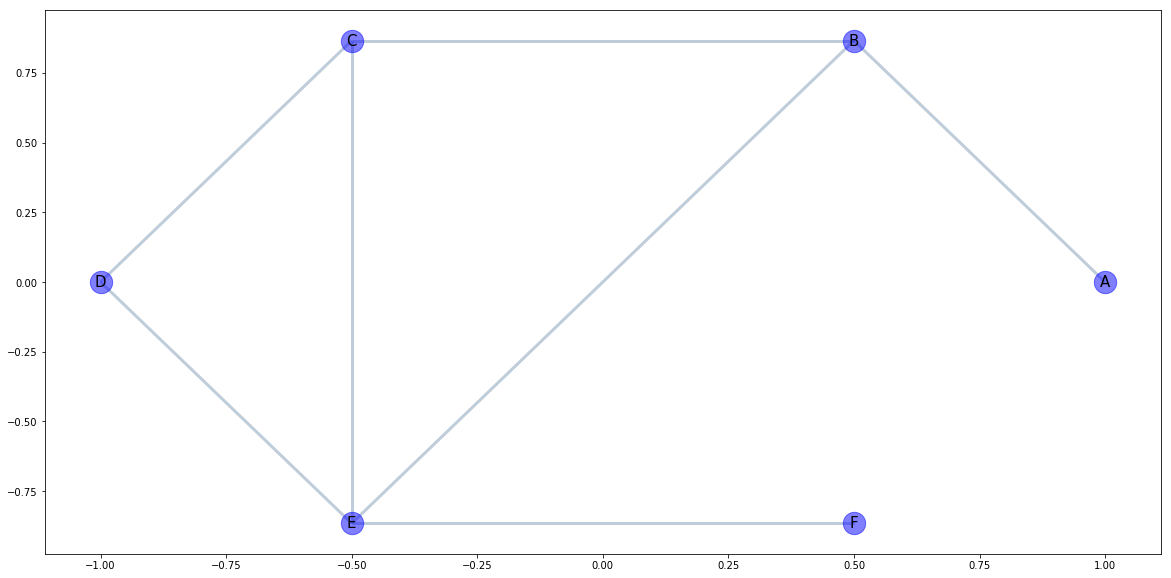

In [5]:
G = nx.from_dict_of_lists(a_l)
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b', alpha=0.5)
nx.draw_networkx_edges(G, pos, edge_color='#2d5986',
                               alpha=0.3, width=3)
nx.draw_networkx_labels(G,pos, font_size=15)


## 1.2 Instant Graph

Similarly we can extract the instant graph at any time instant in the initial time windows.
For example at instant *t=7.0*.

In [6]:
a_l = S.instant_graph(7) # This method returns an adjacency list

/home/leo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{'A': Text(0.9999999999999999, 2.38418583364819e-08, 'A'),
 'B': Text(0.30901696042448806, 0.9510565808604344, 'B'),
 'C': Text(-0.8090170945349412, 0.587785218735669, 'C'),
 'E': Text(-0.8090169753256495, -0.5877853498658898, 'E'),
 'F': Text(0.30901710943610267, -0.9510564735720718, 'F')}

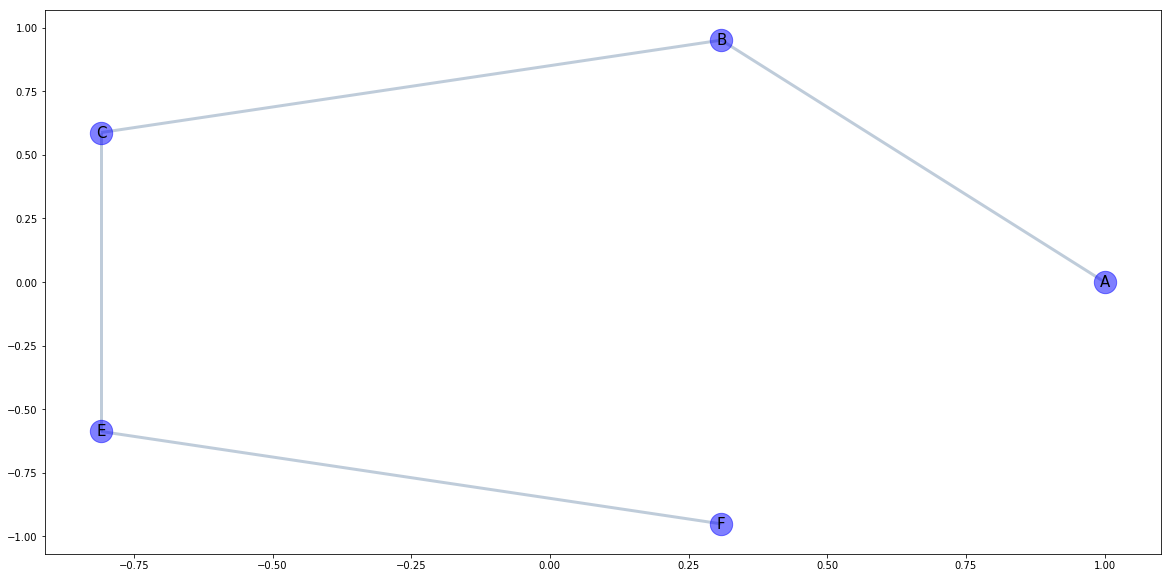

In [7]:
G = nx.from_dict_of_lists(a_l)
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b', alpha=0.5)
nx.draw_networkx_edges(G, pos, edge_color='#2d5986',
                               alpha=0.3, width=3)
nx.draw_networkx_labels(G,pos, font_size=15)

# 2. Substreams

We define several types of substreams:
    - substreams based on nodes (or node's label)
    - substreams based on links
    - substreams based on time
                              

## 2.1 Substreams based on time

We can extract the substream corresponding to a given time windows.
For example, we extract the substream between the instant 3 and 7.

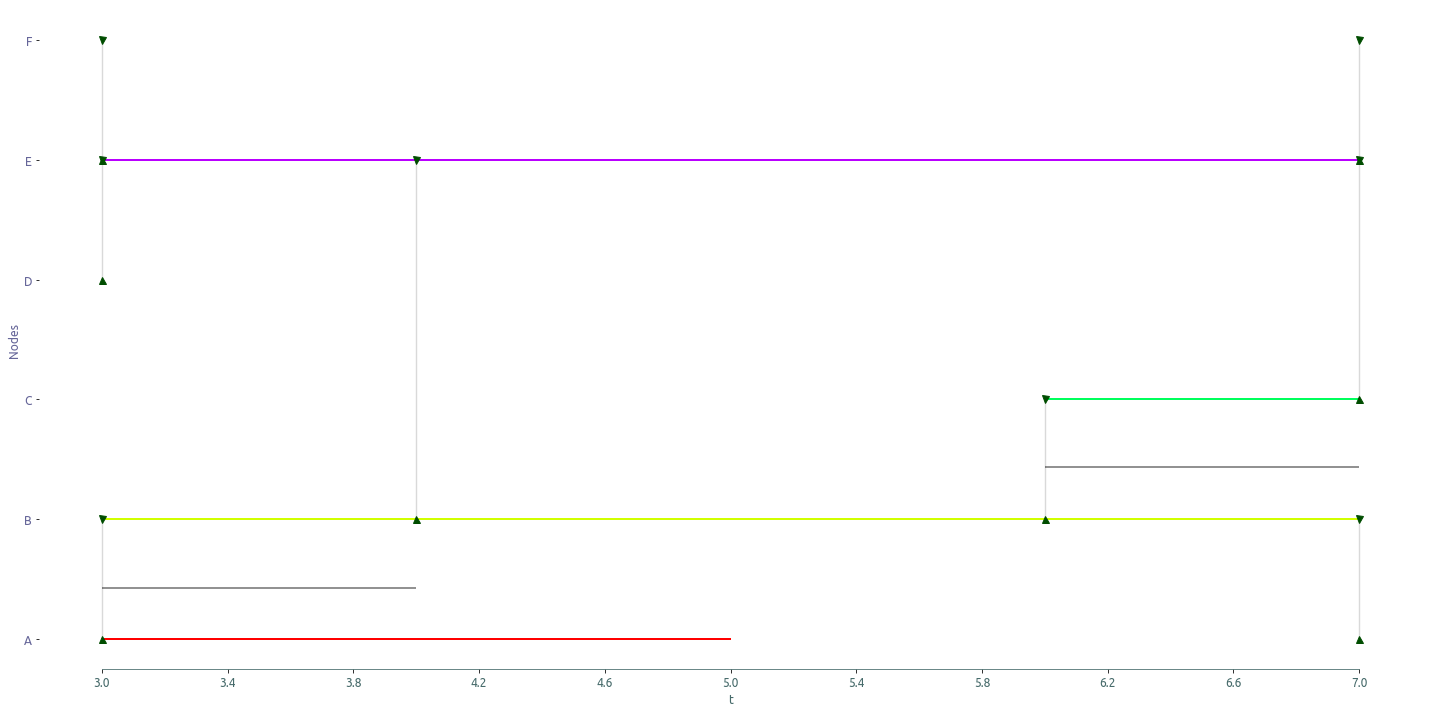

In [8]:
ss = S.induced_substream_by_time_window([3,7])
ss.plot()

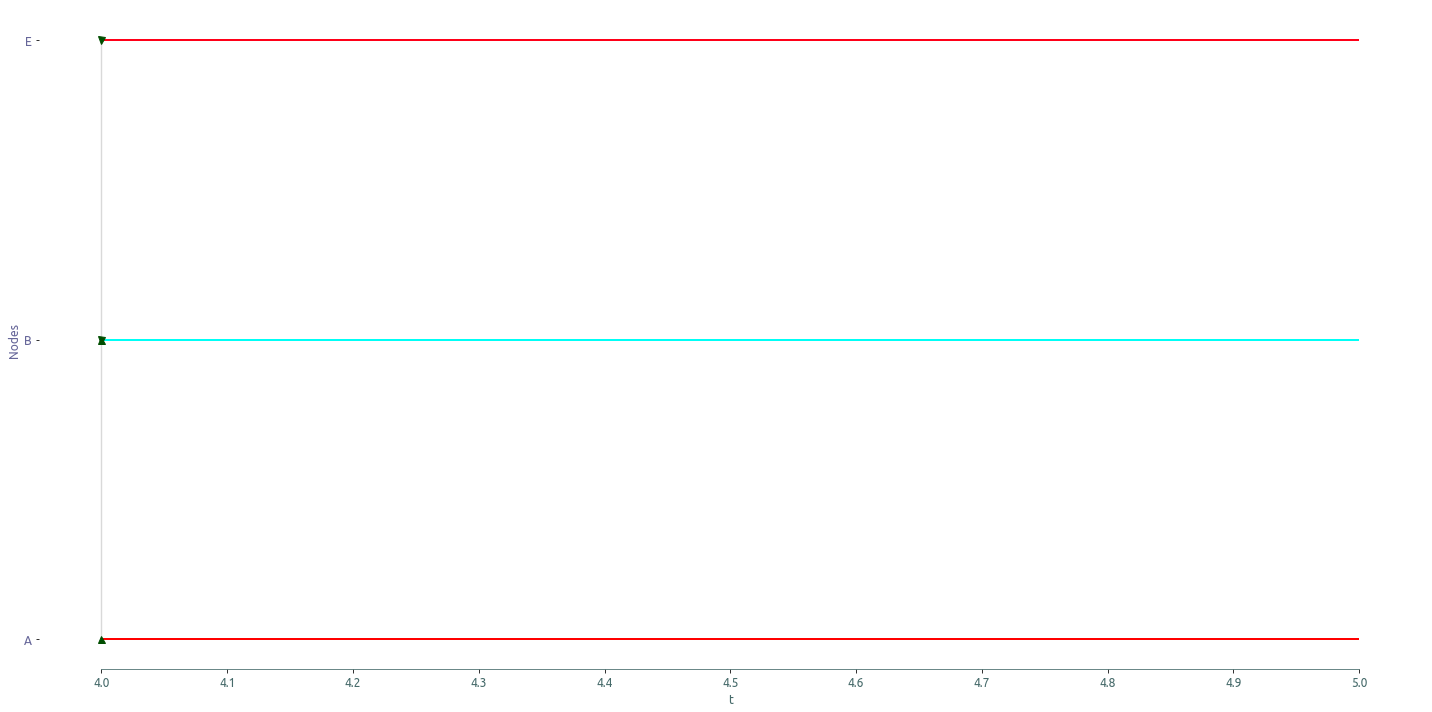

In [9]:
ss = S.induced_substream_by_time_window([4,5])
ss.plot()

## 2.2 Substreams based on nodes

Straph allows to extract a substream by a list of nodes (elements of *V*).

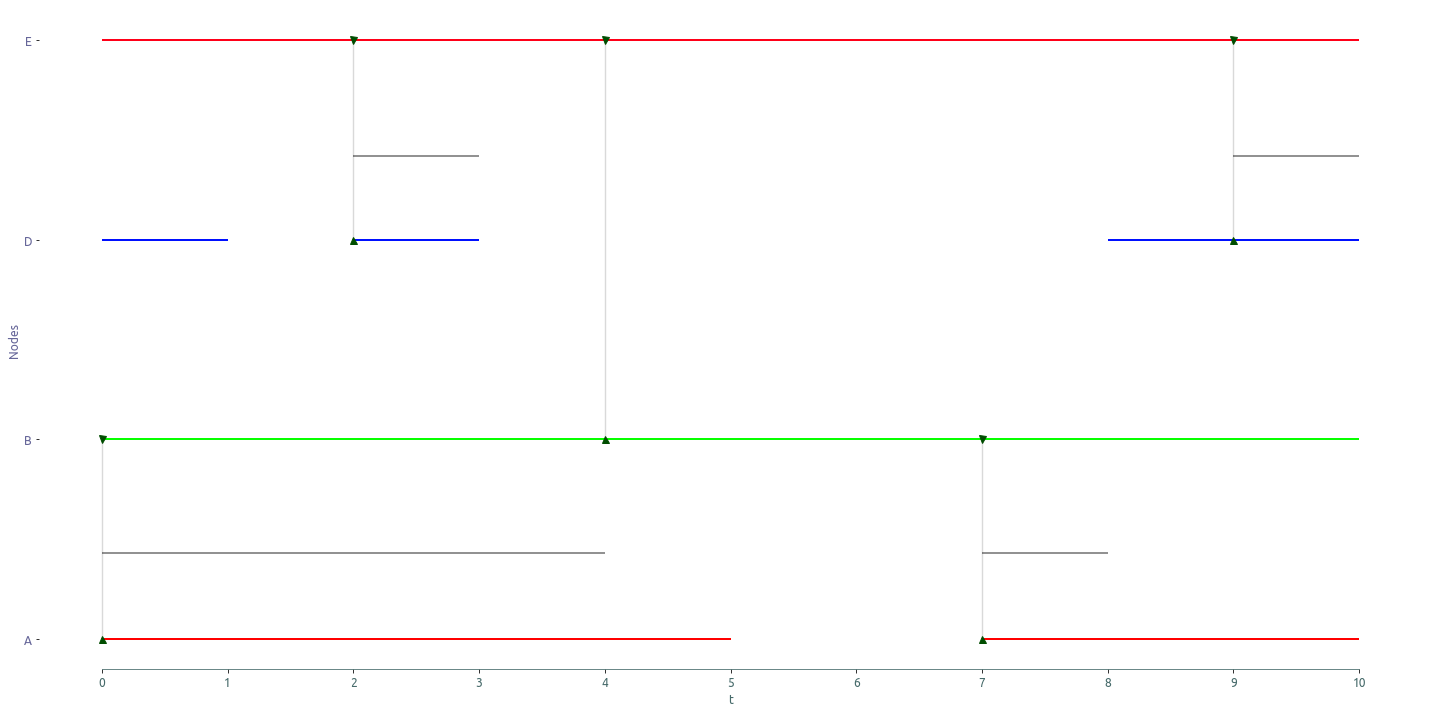

In [10]:
# We can filter by nodes or by their label
ss = S.induced_substream_by_nodes([0,1,3,4])
ss.plot()

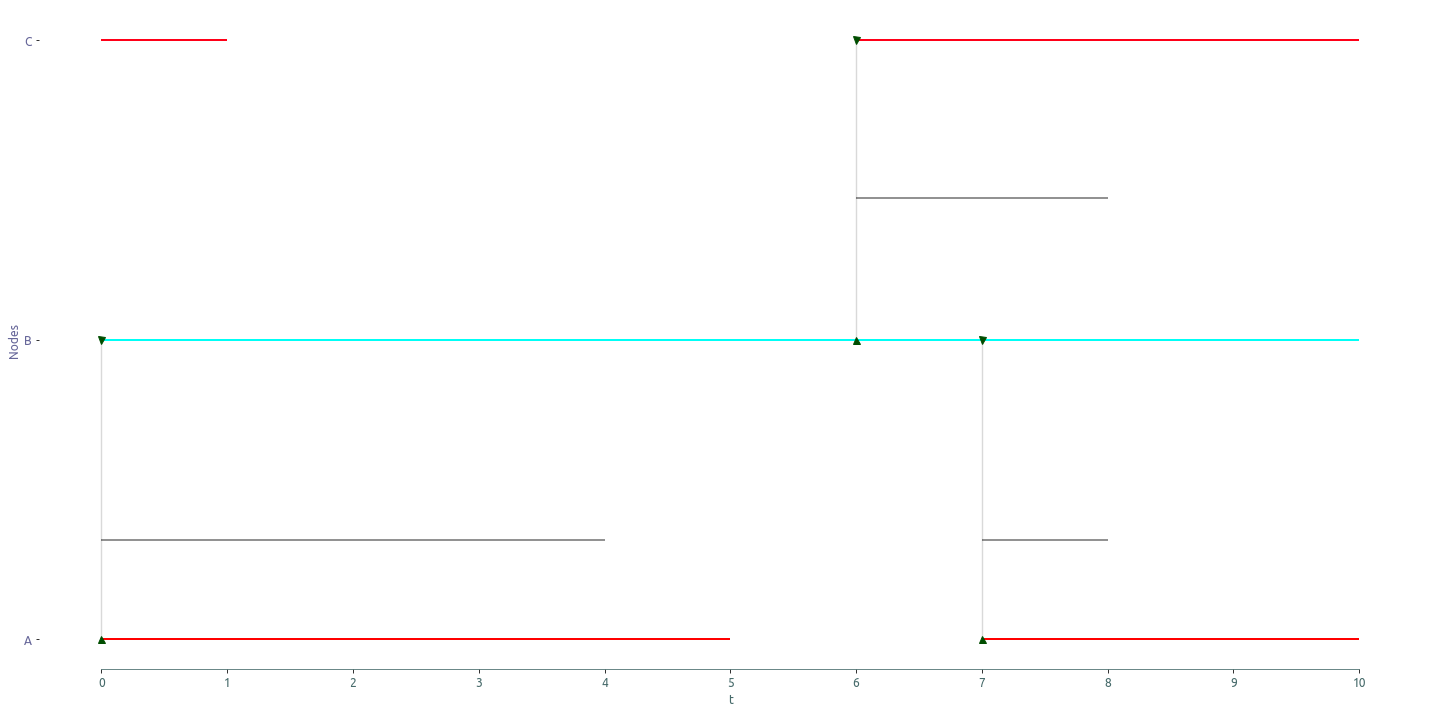

In [11]:
ss = S.induced_substream_by_nodes(['A','B','C'])
ss.plot()

We can also extract a substream with a list of temporal nodes.
The function *substream* takes as a parameter a cluster: a list of temporal nodes (element of *W*). 

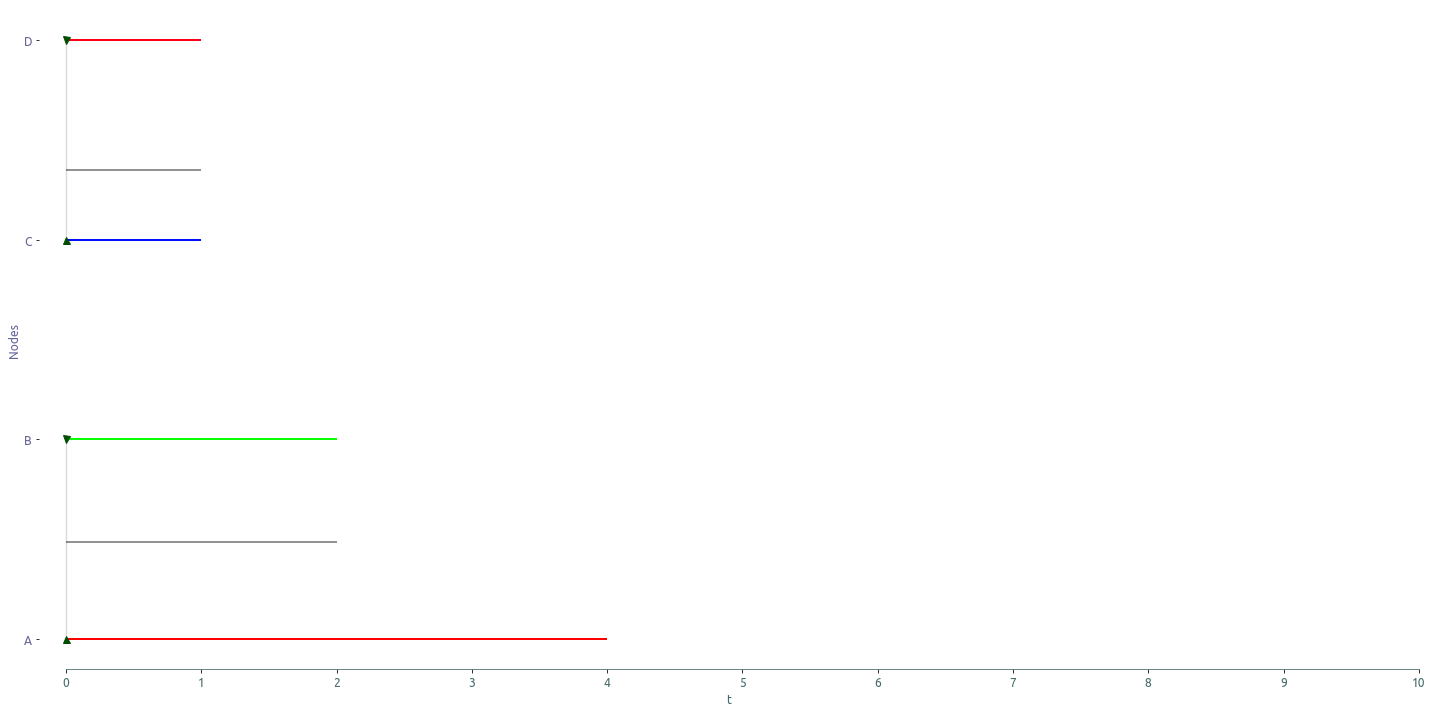

In [12]:
ss = S.substream([(0,4,0),(0,2,1),(0,1,2),(0,1,3)])
ss.plot()

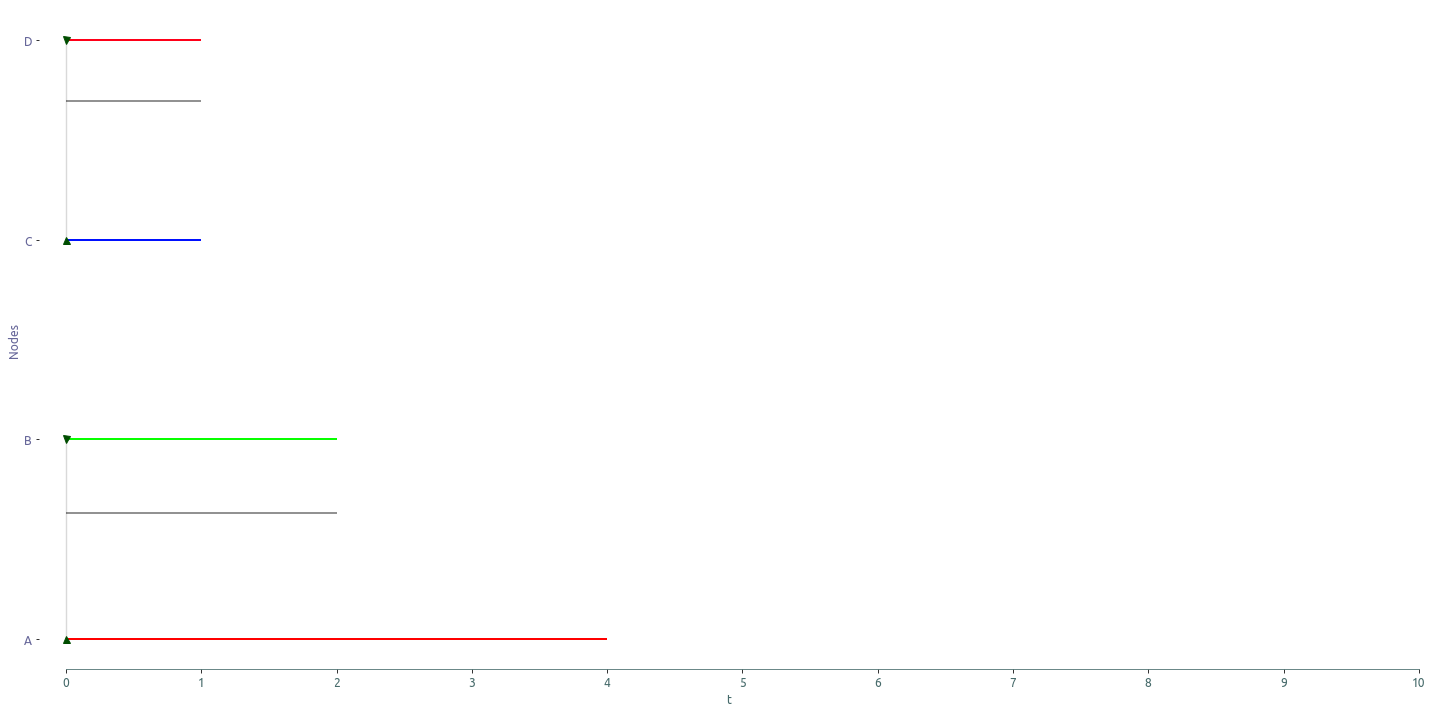

In [23]:
ss = S.substream([(0,4,'A'),(0,2,'B'),(0,1,'C'),(0,1,'D')])
ss.plot()

## 2.3 Substreams based on links

Likewise we can extract a substream with a list of links (nodes ids or labels).

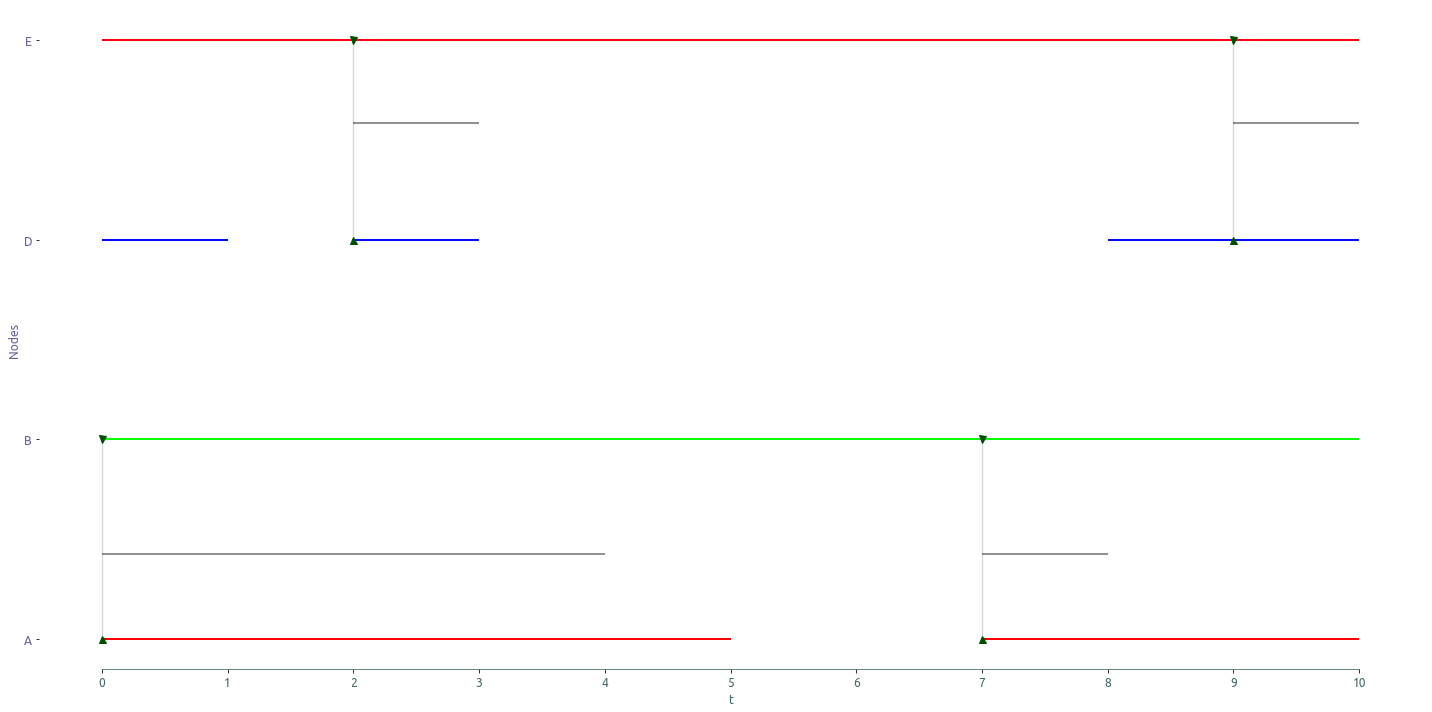

In [14]:
ss = S.induced_substream_by_links([(0,1),(3,4)])
ss.plot()

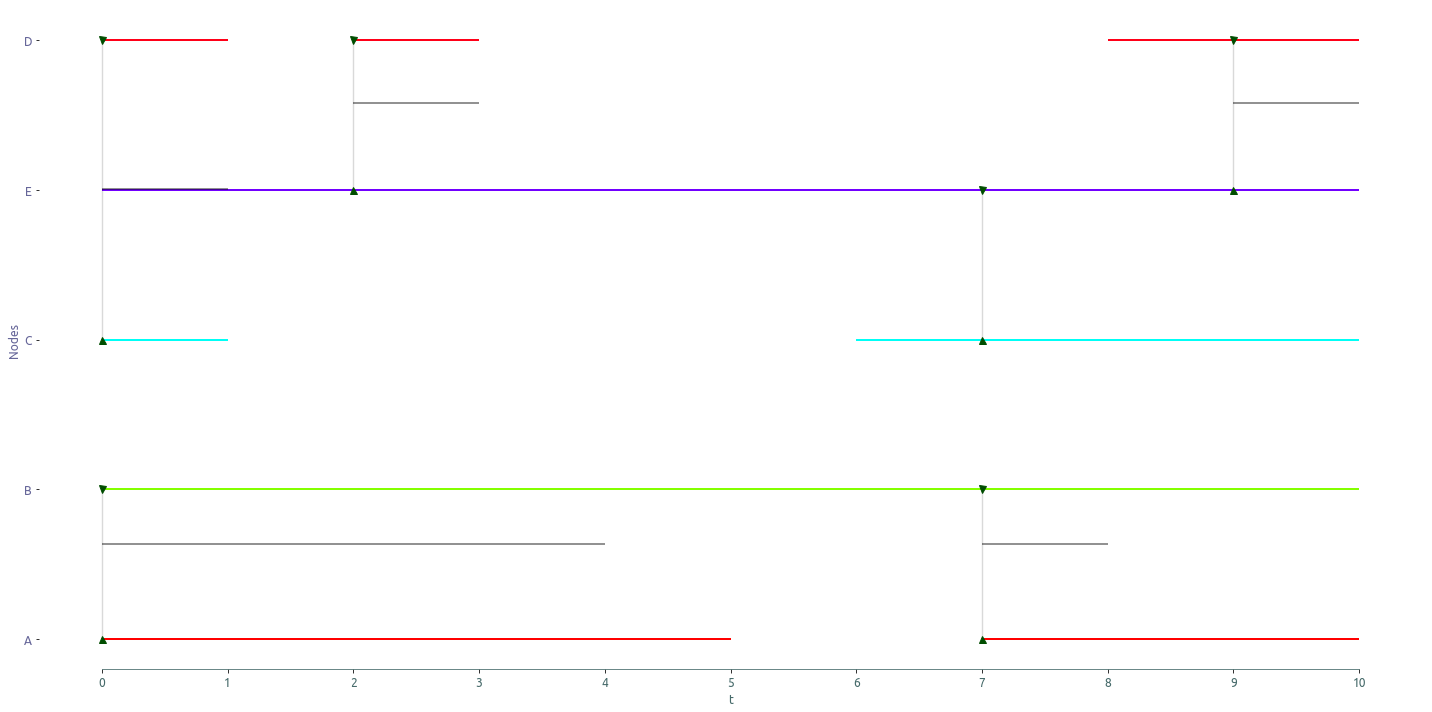

In [15]:
ss = S.induced_substream_by_links([('A','B'),('C','D'),('C','E'),('E','D')])
ss.plot()

# 3. Combinaison of filters

We can combine previous filters to get a very particular substream.
For example if we want the nodes *A* and *(3,4,B)* as well as the link *(C,D)* during the time window [1,9].

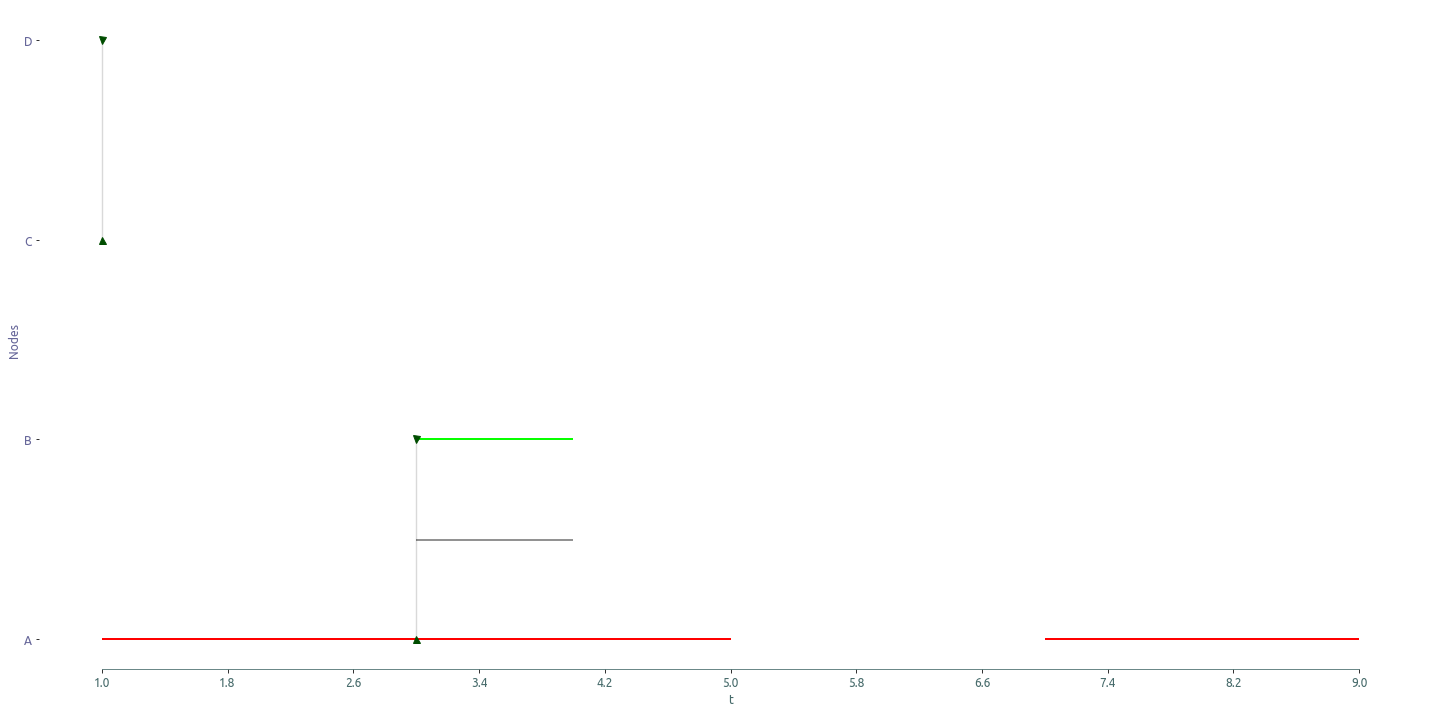

In [26]:

# If we filter by label, we get the reverse index:
label_to_node = {v:k for k,v in S.node_to_label.items()}
# Then we get the whole presence of 'A' and the presence of the link between 'C' and 'D'
prez_A = S.node_presence[label_to_node['A']]
cluster_A = [(t0,t1,'A') for t0,t1 in zip(prez_A[::2],prez_A[1::2])]

for i,l in enumerate(S.links):
    if l == (label_to_node['C'],label_to_node['D']) or l == (label_to_node['D'],label_to_node['C']):
        prez_CD = S.link_presence[i]
        break

cluster_C = [(t0,t1,'C') for t0,t1 in zip(prez_CD[::2],prez_CD[1::2])]
cluster_D = [(t0,t1,'D') for t0,t1 in zip(prez_CD[::2],prez_CD[1::2])]

cluster_B = [(3,4,'B')]

ss = S.substream(cluster_A+cluster_B+cluster_C+cluster_D)
# Filter by the time window:
ss = ss.induced_substream_by_time_window([1,9])

ss.plot()